<a href="https://colab.research.google.com/github/sanjogmish/Health-Insurance-Cross-Sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION_edit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [4]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
len(df[df['Response']==1])/len(df[df['Response']==0])

0.13968343206767964

In [6]:
df.groupby('Vehicle_Age').count()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Vehicle_Age,,,,,,,,,,,
1-2 Year,200316,200316,200316,200316,200316,200316,200316,200316,200316,200316,200316
< 1 Year,164786,164786,164786,164786,164786,164786,164786,164786,164786,164786,164786
> 2 Years,16007,16007,16007,16007,16007,16007,16007,16007,16007,16007,16007


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
df.groupby('Vehicle_Damage').count()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Vehicle_Damage,,,,,,,,,,,
No,188696,188696,188696,188696,188696,188696,188696,188696,188696,188696,188696
Yes,192413,192413,192413,192413,192413,192413,192413,192413,192413,192413,192413


In [225]:
df_copy = df.copy()

In [226]:
import numpy as np

In [227]:
df_copy['Gender'] = np.where(df_copy['Gender']=='Male',1,0)
df_copy.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [228]:
df_copy.drop(columns = ['id'],inplace = True)

In [229]:
list_of_regions = list(set(df_copy['Region_Code'].values))

In [230]:
list_of_in_category = list(df_copy.groupby('Region_Code')['Response'].mean().values)

In [231]:
overall_mean = df_copy['Response'].mean()

In [232]:
frequency_of_regions = list(df_copy.groupby('Region_Code')['Gender'].count().values)

In [233]:
encoded_list = list()
m=0.2
for i in range(0,53):
   encoded_list.append((frequency_of_regions[i]/(frequency_of_regions[i] + m)) * list_of_in_category[i] + (1 - frequency_of_regions[i]/(frequency_of_regions[i] + m)) * overall_mean)

In [234]:
dictionary_of_region_encoded = dict(zip(list_of_regions,encoded_list))

In [235]:
for i in list_of_regions:
    df_copy['Region_Code'] = np.where(df_copy['Region_Code']==i,dictionary_of_region_encoded.get(i),df_copy['Region_Code'])

In [236]:
df_copy.rename(columns={'Region_Code':'Encoded_Region'},inplace=True)

In [237]:
df_copy

,Gender,Age,Driving_License,Encoded_Region,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,0.187163,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1,76,1,0.127662,0,1-2 Year,No,33536.0,26.0,183,0
2,1,47,1,0.187163,0,> 2 Years,Yes,38294.0,26.0,27,1
3,1,21,1,0.112760,1,< 1 Year,No,28619.0,152.0,203,0
4,0,29,1,0.121776,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,0.072288,1,1-2 Year,No,30170.0,26.0,88,0
381105,1,30,1,0.079260,1,< 1 Year,No,40016.0,152.0,131,0
381106,1,21,1,0.073826,1,< 1 Year,No,35118.0,160.0,161,0
381107,0,68,1,0.090211,0,> 2 Years,Yes,44617.0,124.0,74,0


In [238]:
df_copy['> 2 Years'] = np.where(df_copy['Vehicle_Age']=='> 2 Years',1,0)
df_copy['1-2 Year'] = np.where(df_copy['Vehicle_Age']=='1-2 Year',1,0)
df_copy['< 1 Year'] = np.where(df_copy['Vehicle_Age']=='< 1 Year',1,0)

In [239]:
df_copy

,Gender,Age,Driving_License,Encoded_Region,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,> 2 Years,1-2 Year,< 1 Year
0,1,44,1,0.187163,0,> 2 Years,Yes,40454.0,26.0,217,1,1,0,0
1,1,76,1,0.127662,0,1-2 Year,No,33536.0,26.0,183,0,0,1,0
2,1,47,1,0.187163,0,> 2 Years,Yes,38294.0,26.0,27,1,1,0,0
3,1,21,1,0.112760,1,< 1 Year,No,28619.0,152.0,203,0,0,0,1
4,0,29,1,0.121776,1,< 1 Year,No,27496.0,152.0,39,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,0.072288,1,1-2 Year,No,30170.0,26.0,88,0,0,1,0
381105,1,30,1,0.079260,1,< 1 Year,No,40016.0,152.0,131,0,0,0,1
381106,1,21,1,0.073826,1,< 1 Year,No,35118.0,160.0,161,0,0,0,1
381107,0,68,1,0.090211,0,> 2 Years,Yes,44617.0,124.0,74,0,1,0,0


In [240]:
df_copy['Vehicle_Damage'] = df_copy['Vehicle_Damage'].apply(lambda x:1 if x=='Yes' else 0)

In [241]:
df_copy.drop('Vehicle_Age',axis=1,inplace=True)

In [242]:
df_copy

,Gender,Age,Driving_License,Encoded_Region,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,> 2 Years,1-2 Year,< 1 Year
0,1,44,1,0.187163,0,1,40454.0,26.0,217,1,1,0,0
1,1,76,1,0.127662,0,0,33536.0,26.0,183,0,0,1,0
2,1,47,1,0.187163,0,1,38294.0,26.0,27,1,1,0,0
3,1,21,1,0.112760,1,0,28619.0,152.0,203,0,0,0,1
4,0,29,1,0.121776,1,0,27496.0,152.0,39,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,0.072288,1,0,30170.0,26.0,88,0,0,1,0
381105,1,30,1,0.079260,1,0,40016.0,152.0,131,0,0,0,1
381106,1,21,1,0.073826,1,0,35118.0,160.0,161,0,0,0,1
381107,0,68,1,0.090211,0,1,44617.0,124.0,74,0,1,0,0


In [243]:
list_of_channels = list(set(df_copy['Policy_Sales_Channel'].values))
list_of_in_category_channels = list(df_copy.groupby('Policy_Sales_Channel')['Response'].mean().values)
frequency_of_channels = list(df_copy.groupby('Policy_Sales_Channel')['Gender'].count().values)
encoded_list_channels = list()
for i in range(0,155):
   encoded_list_channels.append((frequency_of_channels[i]/(frequency_of_channels[i] + m)) * list_of_in_category_channels[i] + (1 - frequency_of_channels[i]/(frequency_of_channels[i] + m)) * overall_mean)

In [244]:
dictionary_of_encoded_channels = dict(zip(list_of_channels,encoded_list_channels))
for i in list_of_channels:
    df_copy['Policy_Sales_Channel'] = np.where(df_copy['Policy_Sales_Channel']==i,dictionary_of_encoded_channels.get(i),df_copy['Policy_Sales_Channel'])

In [245]:
df_copy.rename(columns={'Policy_Sales_Channel':'Encoded_Policy_Channel'},inplace=True)

In [246]:
df_copy

,Gender,Age,Driving_License,Encoded_Region,Previously_Insured,Vehicle_Damage,Annual_Premium,Encoded_Policy_Channel,Vintage,Response,> 2 Years,1-2 Year,< 1 Year
0,1,44,1,0.187163,0,1,40454.0,0.199385,217,1,1,0,0
1,1,76,1,0.127662,0,0,33536.0,0.199385,183,0,0,1,0
2,1,47,1,0.187163,0,1,38294.0,0.199385,27,1,1,0,0
3,1,21,1,0.112760,1,0,28619.0,0.028624,203,0,0,0,1
4,0,29,1,0.121776,1,0,27496.0,0.028624,39,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,0.072288,1,0,30170.0,0.199385,88,0,0,1,0
381105,1,30,1,0.079260,1,0,40016.0,0.028624,131,0,0,0,1
381106,1,21,1,0.073826,1,0,35118.0,0.021811,161,0,0,0,1
381107,0,68,1,0.090211,0,1,44617.0,0.189148,74,0,1,0,0


# OUTLIERS REMOVAL

## FIRST WE WILL REMOVE OUTLIERS FROM INDIVIDUAL FEATURE SPACE WHICH INCLUDES 'AGE' , 'ANNUAL_PREMIUM' AND 'VINTAGE'

In [247]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, "BOX PLOT FOR 'AGE'")

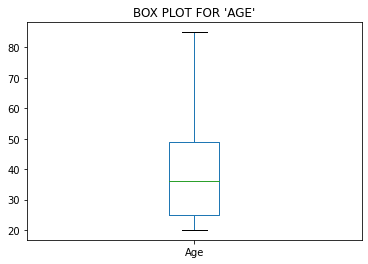

In [248]:
df_copy['Age'].plot(kind="box")
plt.title("BOX PLOT FOR 'AGE'")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


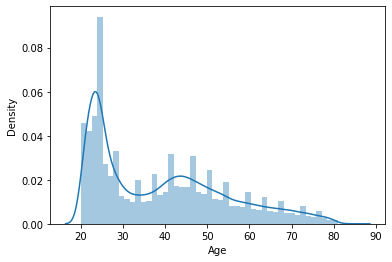

In [249]:
import seaborn as sns
sns.distplot(df_copy['Age'],hist=True)

Text(0.5, 1.0, "BOX PLOT FOR 'Annual_Premium'")

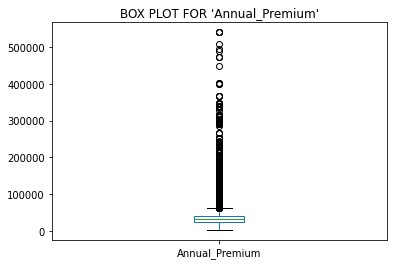

In [250]:
df_copy['Annual_Premium'].plot(kind="box")
plt.title("BOX PLOT FOR 'Annual_Premium'")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


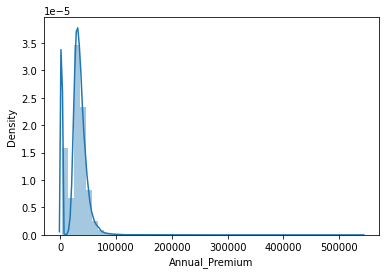

In [251]:
import seaborn as sns
sns.distplot(df_copy['Annual_Premium'],hist=True)

In [252]:
df_copy['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [253]:
df_copy.loc[df_copy['Annual_Premium']>61892,'Annual_Premium'].count()

10320

Text(0.5, 1.0, "BOX PLOT FOR 'Vintage'")

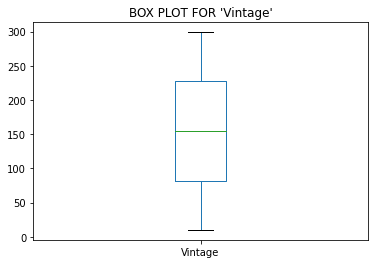

In [254]:
df_copy['Vintage'].plot(kind="box")
plt.title("BOX PLOT FOR 'Vintage'")

ONLY 'ANNUAL PREMIUM' CONTAINS OUTLIERS. ALSO SINCE 'VINTAGE', 'AGE' AND 'ANNUAL PREMIUM' ARE TO BE SCALED; USING LOG TRANSFORM TO BOTH COLUMNS WILL HELP TO REMOVE OUTLIERS FROM 'ANNUAL PREMIUM' AND ALSO THE DATASET CAN USED FOR MODELLING IN LOGISTIC.

In [255]:
df_copy['Age'] = np.log(df_copy['Age'])
df_copy['Annual_Premium'] = np.log(df_copy['Annual_Premium'])
df_copy['Vintage'] = np.log(df_copy['Vintage'])

In [256]:
df_copy

,Gender,Age,Driving_License,Encoded_Region,Previously_Insured,Vehicle_Damage,Annual_Premium,Encoded_Policy_Channel,Vintage,Response,> 2 Years,1-2 Year,< 1 Year
0,1,3.784190,1,0.187163,0,1,10.607921,0.199385,5.379897,1,1,0,0
1,1,4.330733,1,0.127662,0,0,10.420375,0.199385,5.209486,0,0,1,0
2,1,3.850148,1,0.187163,0,1,10.553049,0.199385,3.295837,1,1,0,0
3,1,3.044522,1,0.112760,1,0,10.261826,0.028624,5.313206,0,0,0,1
4,0,3.367296,1,0.121776,1,0,10.221796,0.028624,3.663562,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,4.304065,1,0.072288,1,0,10.314603,0.199385,4.477337,0,0,1,0
381105,1,3.401197,1,0.079260,1,0,10.597035,0.028624,4.875197,0,0,0,1
381106,1,3.044522,1,0.073826,1,0,10.466469,0.021811,5.081404,0,0,0,1
381107,0,4.219508,1,0.090211,0,1,10.705870,0.189148,4.304065,0,1,0,0


In [257]:
features = list()
for i in df_copy.columns:
  if i=='Response':
    pass
  else:
    features.append(i)

In [258]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [259]:
X = df_copy[features].values
y = df_copy['Response'].values

In [260]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(304887, 12)
(76222, 12)


In [261]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 304887
Resampled dataset shape 535106


In [262]:
X_smote[:,[1,6,8]] = scaler.fit_transform(X_smote[:,[1,6,8]])

In [263]:
X_smote

array([[0.        , 0.03372004, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.1542198 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.69914136, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.28658623, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.42516937, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.53422168, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [264]:
X_smote[:,[1,6,8]] = scaler.transform(X_smote[:,[1,6,8]])

In [265]:
X_smote

array([[ 0.        , -2.04711685,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -1.96383661,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , -1.5872284 ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.        , -1.87235503,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -1.77657694,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -1.7012083 ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [266]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_smote, y_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [267]:
train_class_preds = clf.predict(X_smote)
test_class_preds = clf.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_accuracy = accuracy_score(train_class_preds,y_smote)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7918468490355182
The accuracy on test data is  0.18059090551284407


In [269]:
from sklearn import metrics

In [270]:
print(metrics.classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       1.00      0.07      0.12     66846
           1       0.13      1.00      0.23      9376

    accuracy                           0.18     76222
   macro avg       0.57      0.53      0.18     76222
weighted avg       0.89      0.18      0.14     76222



In [271]:
# pd.set_option('display.max_rows', 10)
# df.groupby(['Region_Code','Response'])['id'].count()